In [1]:
# 1. Classification_abalone

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("/Users/gim-yuseong/Desktop/PycharmProjects/2024_3_2/2024_3_2_딥러닝응용/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# df의 행의 갯수, 열의 갯수, feature 파악

df.shape, df.columns

((4177, 10),
 Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
        'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
       dtype='object'))

In [4]:
# 결측치 확인

df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [5]:
# 결측치 제거

df = df.dropna()
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

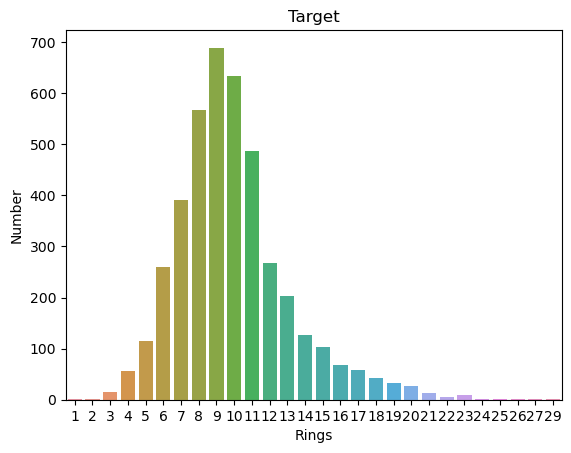

In [6]:
# seaborn countplot을 통한 각 레이블 도수 확인

sns.countplot (data=df, x='Rings')
plt.xlabel ("Rings")
plt.ylabel ("Number")
plt.title ("Target")
plt.show()

In [7]:
# target의 class 도수를 확인 (숫자로)

df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [8]:
# Sex 열을 label encoding

'''
    male : 0
    female : 1
    i (암숫컷) : 2
'''

print (set(df['Sex']))

for idx in range (df.shape[0]) : 
    compo = df.at[idx, 'Sex']
    
    if compo == 'M' : 
        df.at[idx, 'Sex'] = 0
        
    elif compo == 'F' :
        df.at[idx, 'Sex'] = 1
        
    else :
        df.at[idx, 'Sex'] = 2
         
print (set(df['Sex']))

{'F', 'I', 'M'}
{0, 1, 2}


In [9]:
# 특정 component가 0인 값이 있다면 제거해주기

print (df[df == 0].count()) # height 열 중에서 2개가 0임
df = df[df['Height'] != 0]
print (df[df == 0].count())

id                   1
Sex               1528
Length               0
Diameter             0
Height               2
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64
id                   1
Sex               1528
Length               0
Diameter             0
Height               0
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64


/var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_52119/638774577.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


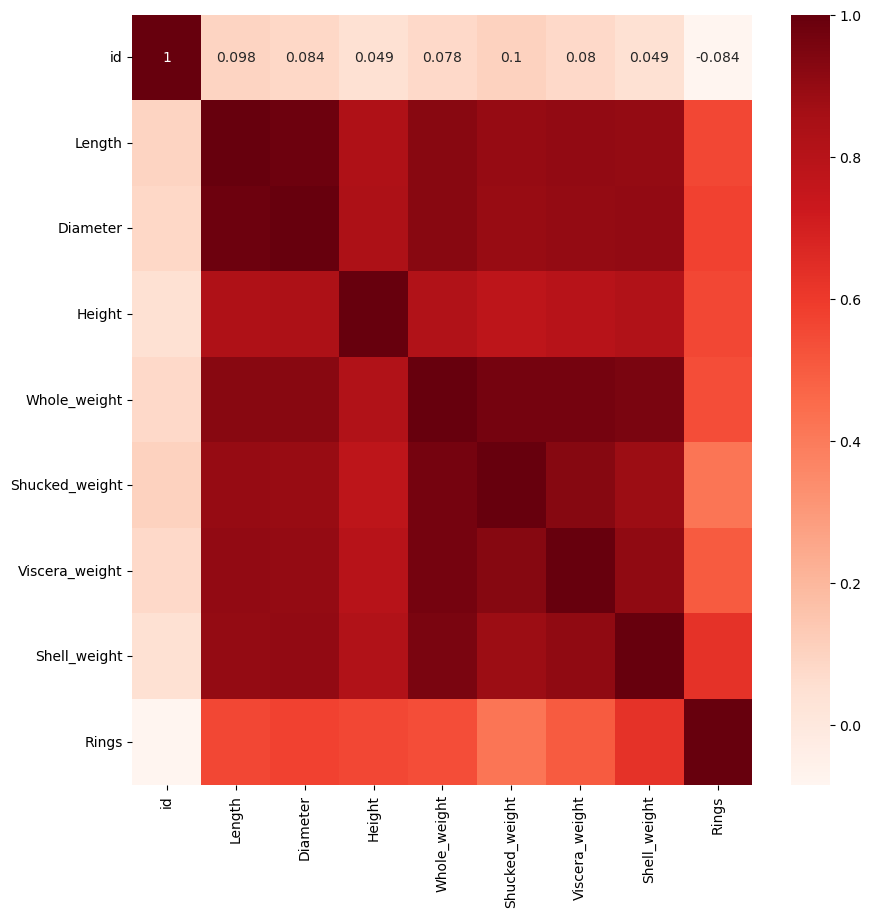

In [10]:
# heatmap 그리기

plt.figure(figsize=(10, 10))

df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cbar=True,
           cmap='Reds', annot_kws={"size": 10})
plt.show()

In [11]:
# Sex, id 특성 제거 및 Rings의 재구성

print (df.columns)
df = df.drop(columns=['Sex']) # Sex 특성 제거
df = df.drop(columns=['id']) # id 특성 제거

from sklearn.preprocessing import LabelEncoder
df['Rings'] = LabelEncoder().fit_transform(df['Rings'])

print (df['Rings'].value_counts())

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')
8     689
9     634
7     567
10    487
6     391
11    267
5     258
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: Rings, dtype: int64


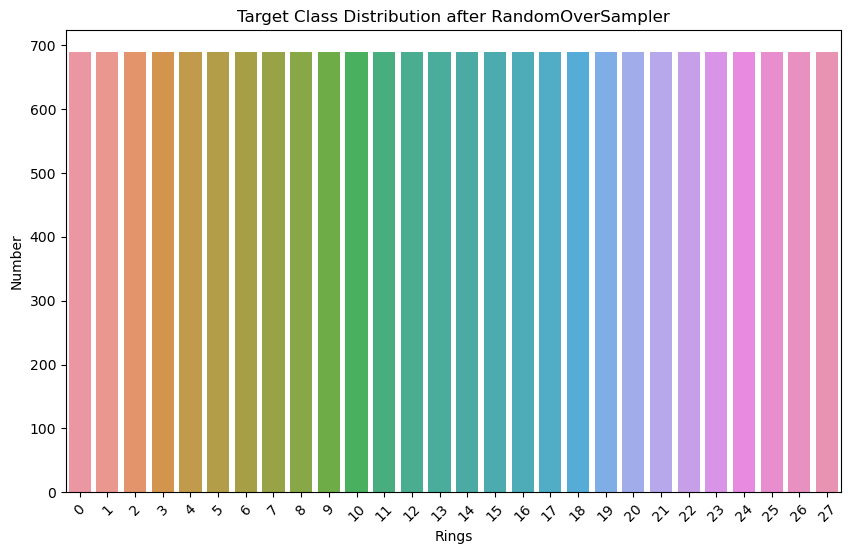

In [12]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

abalone_input = df.drop('Rings', axis=1)
abalone_target = df['Rings']

ros = RandomOverSampler(random_state=0)
abalone_input, abalone_target = ros.fit_resample(abalone_input, abalone_target)

plt.figure(figsize=(10, 6))
sns.countplot(x=abalone_target)
plt.xlabel("Rings")
plt.ylabel("Number")
plt.title("Target Class Distribution after RandomOverSampler")
plt.xticks(rotation=45)
plt.show()

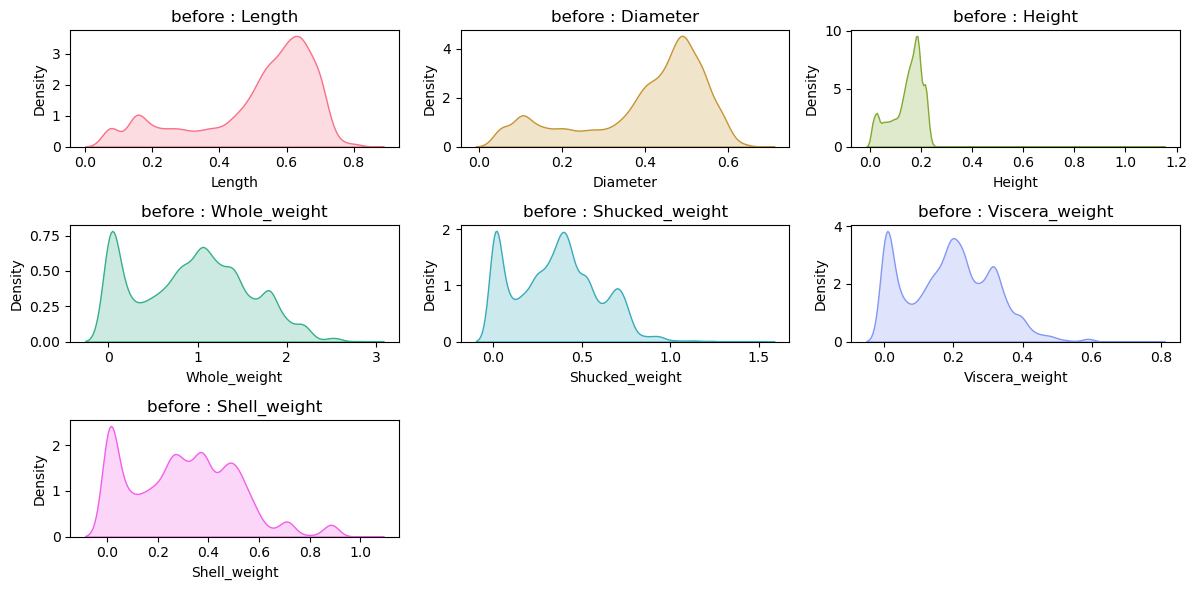

In [13]:
features = df.columns[:-1]  # 'Rings' 제외
plt.figure(figsize=(12, 6))
for i, feature in enumerate (features) :
    plt.subplot(3, 3, i+1)
    sns.kdeplot(abalone_input[feature], fill=True, color=sns.color_palette("husl", len(features))[i])
    plt.title(f'before : {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

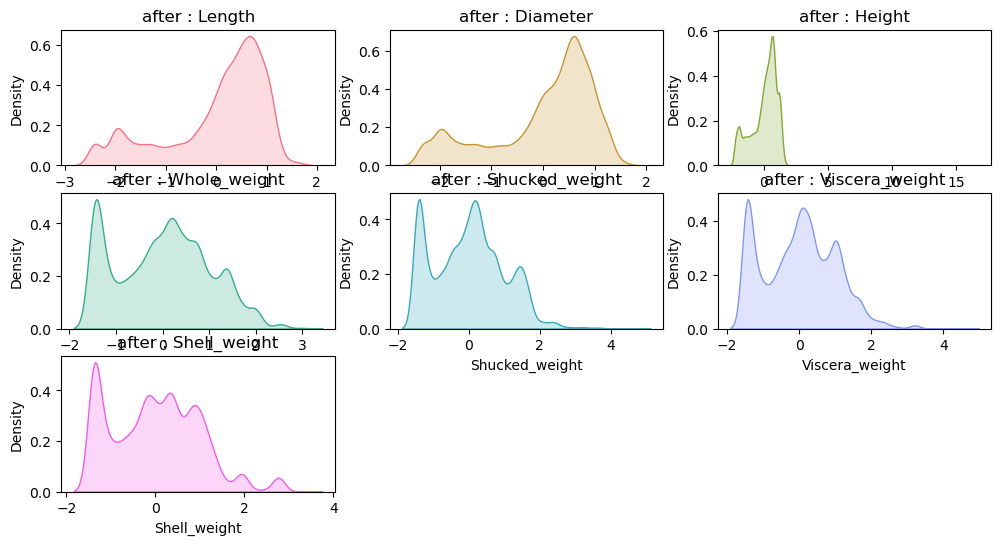

In [14]:
from sklearn.preprocessing import StandardScaler

normalizier = StandardScaler()
abalone_input_scaled = pd.DataFrame(normalizier.fit_transform(abalone_input), 
                                    columns=df.columns[:-1])  # normalization

features = df.columns[:-1]  # 'Rings' 제외
plt.figure(figsize=(12, 6))
for i, feature in enumerate (features) :
    plt.subplot(3, 3, i+1)
    sns.kdeplot(abalone_input_scaled[feature], fill=True, color=sns.color_palette("husl", len(features))[i])
    plt.title(f'after : {feature}')
    plt.xlabel(feature)

In [15]:
from collections import Counter

def split_sequences_freq(sequences, n_steps):
    X, y = list(), list()
    
    # Check if sequences is a DataFrame, convert if necessary
    if not isinstance(sequences, pd.DataFrame):
        sequences = pd.DataFrame(sequences)

    for i in range(len(sequences)):
        end_ix = i + n_steps

        if end_ix > len(sequences):
            break

        seq_x = sequences.iloc[i:end_ix, :-1].values
        seq_y = sequences.iloc[i:end_ix, -1].values   
        
        # Find the most frequent class in seq_y
        most_frequent_class = Counter(seq_y).most_common(1)[0][0]
        
        X.append(seq_x)
        y.append(int(most_frequent_class))

    return np.array(X), np.array(y)

In [16]:
# 순환 데이터 구성

# split_sequence을 이용하여 순환 데이터를 구성

print(abalone_target.isnull().sum())

X_seq, y_seq = split_sequences_freq(np.c_[abalone_input_scaled, abalone_target], 
                                    n_steps=50) # window 사이즈를 50으로 구성

print (X_seq.shape, y_seq.shape)

0
(19243, 50, 7) (19243,)


In [17]:
# 실제로 어떻게 구성되었는지 앞쪽 5개의 component만 출력

print (np.isnan(y_seq).sum())

for idx in range (5) :
    print (f"X_seq[{idx}] : ", X_seq[idx][:5])
    print (f"y_seq[{idx}] : ", y_seq[idx])
    
    if idx == 0 : 
        prev = X_seq[idx]
        print()
        continue

    if (prev[1:] == X_seq[idx][:-1]).all() : 
        '''
            step 1씩 이동했으니깐, 이전 X_train_seq 원소의 2번째 record ~ 마지막번째 record와
            현재 X_train_seq 원소의 첫번째 record ~ 마지막-1번째 record는 같을 수밖에 없습니다.
        '''
         
        print ("window가 step 1씩 이동하면서 순환 데이터를 만듦")
    
    prev = X_seq[idx]
    print()

0
X_seq[0] :  [[-0.30155492 -0.23675716 -0.8067802  -0.66944529 -0.53488412 -0.68733204
  -0.71126156]
 [-0.88361958 -0.90686457 -0.88977619 -1.12891255 -1.05449336 -1.10583231
  -1.09029195]
 [ 0.11420554  0.13180192 -0.1428123  -0.40985026 -0.40186415 -0.36448897
  -0.42698877]
 [-0.38470702 -0.23675716 -0.30880427 -0.66626007 -0.57229598 -0.5837034
  -0.68757216]
 [-0.99448903 -0.97387531 -1.05576816 -1.16156101 -1.0960621  -1.17757522
  -1.16136014]]
y_seq[0] :  8

X_seq[1] :  [[-0.88361958 -0.90686457 -0.88977619 -1.12891255 -1.05449336 -1.10583231
  -1.09029195]
 [ 0.11420554  0.13180192 -0.1428123  -0.40985026 -0.40186415 -0.36448897
  -0.42698877]
 [-0.38470702 -0.23675716 -0.30880427 -0.66626007 -0.57229598 -0.5837034
  -0.68757216]
 [-0.99448903 -0.97387531 -1.05576816 -1.16156101 -1.0960621  -1.17757522
  -1.16136014]
 [-0.46785911 -0.67232697 -0.8067802  -0.92824401 -0.88198309 -0.87466073
  -0.85339796]]
y_seq[1] :  8
window가 step 1씩 이동하면서 순환 데이터를 만듦

X_seq[2] :  [[ 0.1142

In [18]:
# label encoding -> one-hot encoding 

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_seq_encoded = le.fit_transform(y_seq)

y_seq = to_categorical(y_seq)

print(y_seq[:5])  
print(y_seq_encoded[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
[8 8 8 9 9]


In [19]:
# train, test set 구성

from sklearn.model_selection import train_test_split

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq,
                                                    y_seq,
                                                    stratify=y_seq,
                                                    test_size = 0.2) 

print (X_train_seq.shape, y_train_seq.shape)
print (X_test_seq.shape, y_test_seq.shape)

(15394, 50, 7) (15394, 28)
(3849, 50, 7) (3849, 28)


In [20]:
# modeling

from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))

'''
    점점 kernel size를 늘려나가서 feature extraction을 효과적으로 할 수 있도록 구성하였다.
    dense layer를 여기서 더 추가하면 overfitting이 일어나서, 여기서 멈춘다.
'''

# block 1
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
batch_norm1 = BatchNormalization()(conv1)
dropout1 = Dropout(0.2)(batch_norm1)

# block 2
conv2 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(dropout1)
batch_norm2 = BatchNormalization()(conv2)
dropout2 = Dropout(0.2)(batch_norm2)

# block 3
conv3 = Conv1D(filters=16, kernel_size=4, activation='relu', padding='same')(dropout2)
batch_norm3 = BatchNormalization()(conv3)
dropout3 = Dropout(0.2)(batch_norm3)

# flatten
flat = Flatten()(dropout3)

# dense layers
dense1 = Dense(64, activation='relu')(flat)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(28, activation='softmax')(dense2)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()
keras.utils.plot_model(model, 
                       show_shapes=True, 
                       show_layer_activations=True, 
                       show_dtype=True, 
                       show_layer_names=True, 
                       show_trainable=True)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 7)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 49, 64)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 49, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 49, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 49, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 49, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 49, 16)         │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 49, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 49, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │           924 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,892 (245.67 KB)

 Trainable params: 62,668 (244.80 KB)

 Non-trainable params: 224 (896.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [22]:
# compile

optimizer = keras.optimizers.Adam()
model.compile (optimizer=optimizer, 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [27]:
def train_model(model, X_train_seq, y_train_seq):
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train_seq, y_train_seq, epochs=60, 
                        validation_split=0.3,
                        batch_size=128,
                        callbacks=[early_stopping_cb], 
                        verbose=True, shuffle=True)

    return history

from tensorflow import keras

print(X_train_seq.shape)
print(y_train_seq.shape)

input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])  # (n_steps, 특징 수)
history = train_model(model, X_train_seq, y_train_seq)

(15394, 50, 7)
(15394, 28)
Epoch 1/60
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2207 - loss: 2.6796 - val_accuracy: 0.2189 - val_loss: 2.4507
Epoch 2/60
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5704 - loss: 1.1570 - val_accuracy: 0.1979 - val_loss: 2.9455
Epoch 3/60
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7090 - loss: 0.7934 - val_accuracy: 0.2031 - val_loss: 3.8080
Epoch 4/60
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7569 - loss: 0.6552 - val_accuracy: 0.3102 - val_loss: 2.4370
Epoch 5/60
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7616 - loss: 0.6299 - val_accuracy: 0.5317 - val_loss: 1.4758
Epoch 6/60
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7914 - loss: 0.5480 - val_accuracy: 0.7699 - val_loss: 0.6092
Epoch 7/60
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8137 - loss: 0.4936 - val_accuracy: 0.8456 - val_loss: 0.4052
Epoch 8/60
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8277 - loss: 0.4517

{'accuracy': [0.34515079855918884, 0.6105800271034241, 0.7202784419059753, 0.763805091381073, 0.7769837379455566, 0.8006496429443359, 0.812993049621582, 0.8367517590522766, 0.8442691564559937, 0.8541067242622375, 0.8616241216659546, 0.8585614562034607, 0.872018575668335, 0.8718329668045044, 0.881577730178833, 0.8823201656341553, 0.8979118466377258, 0.8979118466377258, 0.8964269161224365, 0.8986542820930481, 0.9073781967163086, 0.9147099852561951, 0.9226914048194885, 0.9216705560684204, 0.9219489693641663, 0.9219489693641663, 0.9271461963653564, 0.9356844425201416, 0.9189791083335876, 0.9341995120048523, 0.9357772469520569, 0.9426450133323669, 0.9430162310600281, 0.9374477863311768, 0.9473782181739807, 0.9428306221961975, 0.9507192373275757, 0.9455220699310303, 0.9470069408416748, 0.9449651837348938, 0.9477494359016418, 0.9584223031997681, 0.9447795748710632, 0.9599999785423279, 0.9538747072219849, 0.9609280824661255, 0.9560092687606812, 0.9544315338134766, 0.9587935209274292, 0.9640835

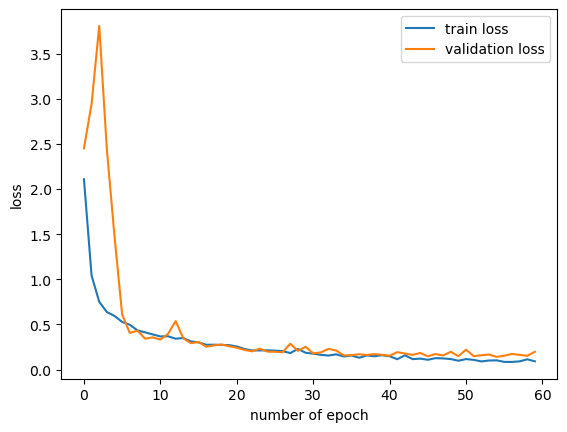

In [37]:
# history 그리고 loss 시각화

print (history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

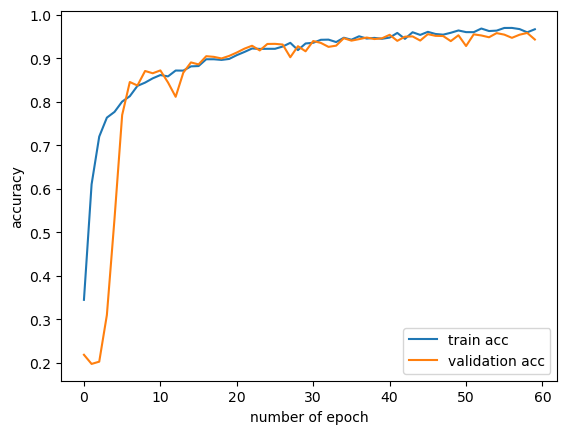

In [38]:
# acc 시각화

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('number of epoch')
plt.ylabel('accuracy')
plt.legend (['train acc', 'validation acc'])
plt.show()

In [39]:
# classification report, confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_test_pred = model.predict(X_test_seq)
print(y_test_pred)

y_test_pred_classes = np.argmax(y_test_pred, axis=1)

if len(y_test_seq.shape) > 1 :  # multilabel-indicator인 경우
    y_test_seq_classes = np.argmax(y_test_seq, axis=1)
else :
    y_test_seq_classes = y_test_seq

cm_test = confusion_matrix(y_test_seq_classes, y_test_pred_classes)
print("- test data confusion matrix -\n")
print(cm_test)

print('\n --------------- \n')

cr_test = classification_report(y_test_seq_classes, y_test_pred_classes)
print("- test data report of classification -\n")
print(cr_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[0.03257937 0.02505522 0.03513566 ... 0.03949347 0.03703482 0.03366508]
 [0.03152416 0.02253336 0.03643419 ... 0.04017648 0.03712574 0.03247702]
 [0.03206494 0.02291707 0.0355841  ... 0.04160291 0.03668993 0.03202825]
 ...
 [0.03214459 0.0259365  0.03745166 ... 0.03811113 0.03645514 0.03506324]
 [0.03093593 0.01946857 0.03763793 ... 0.04106101 0.03815734 0.03267148]
 [0.03085635 0.02201763 0.03475044 ... 0.04012373 0.03663526 0.03092382]]
- test data confusion matrix -

[[  0   0   0   0 141   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 138   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 135   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 126   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


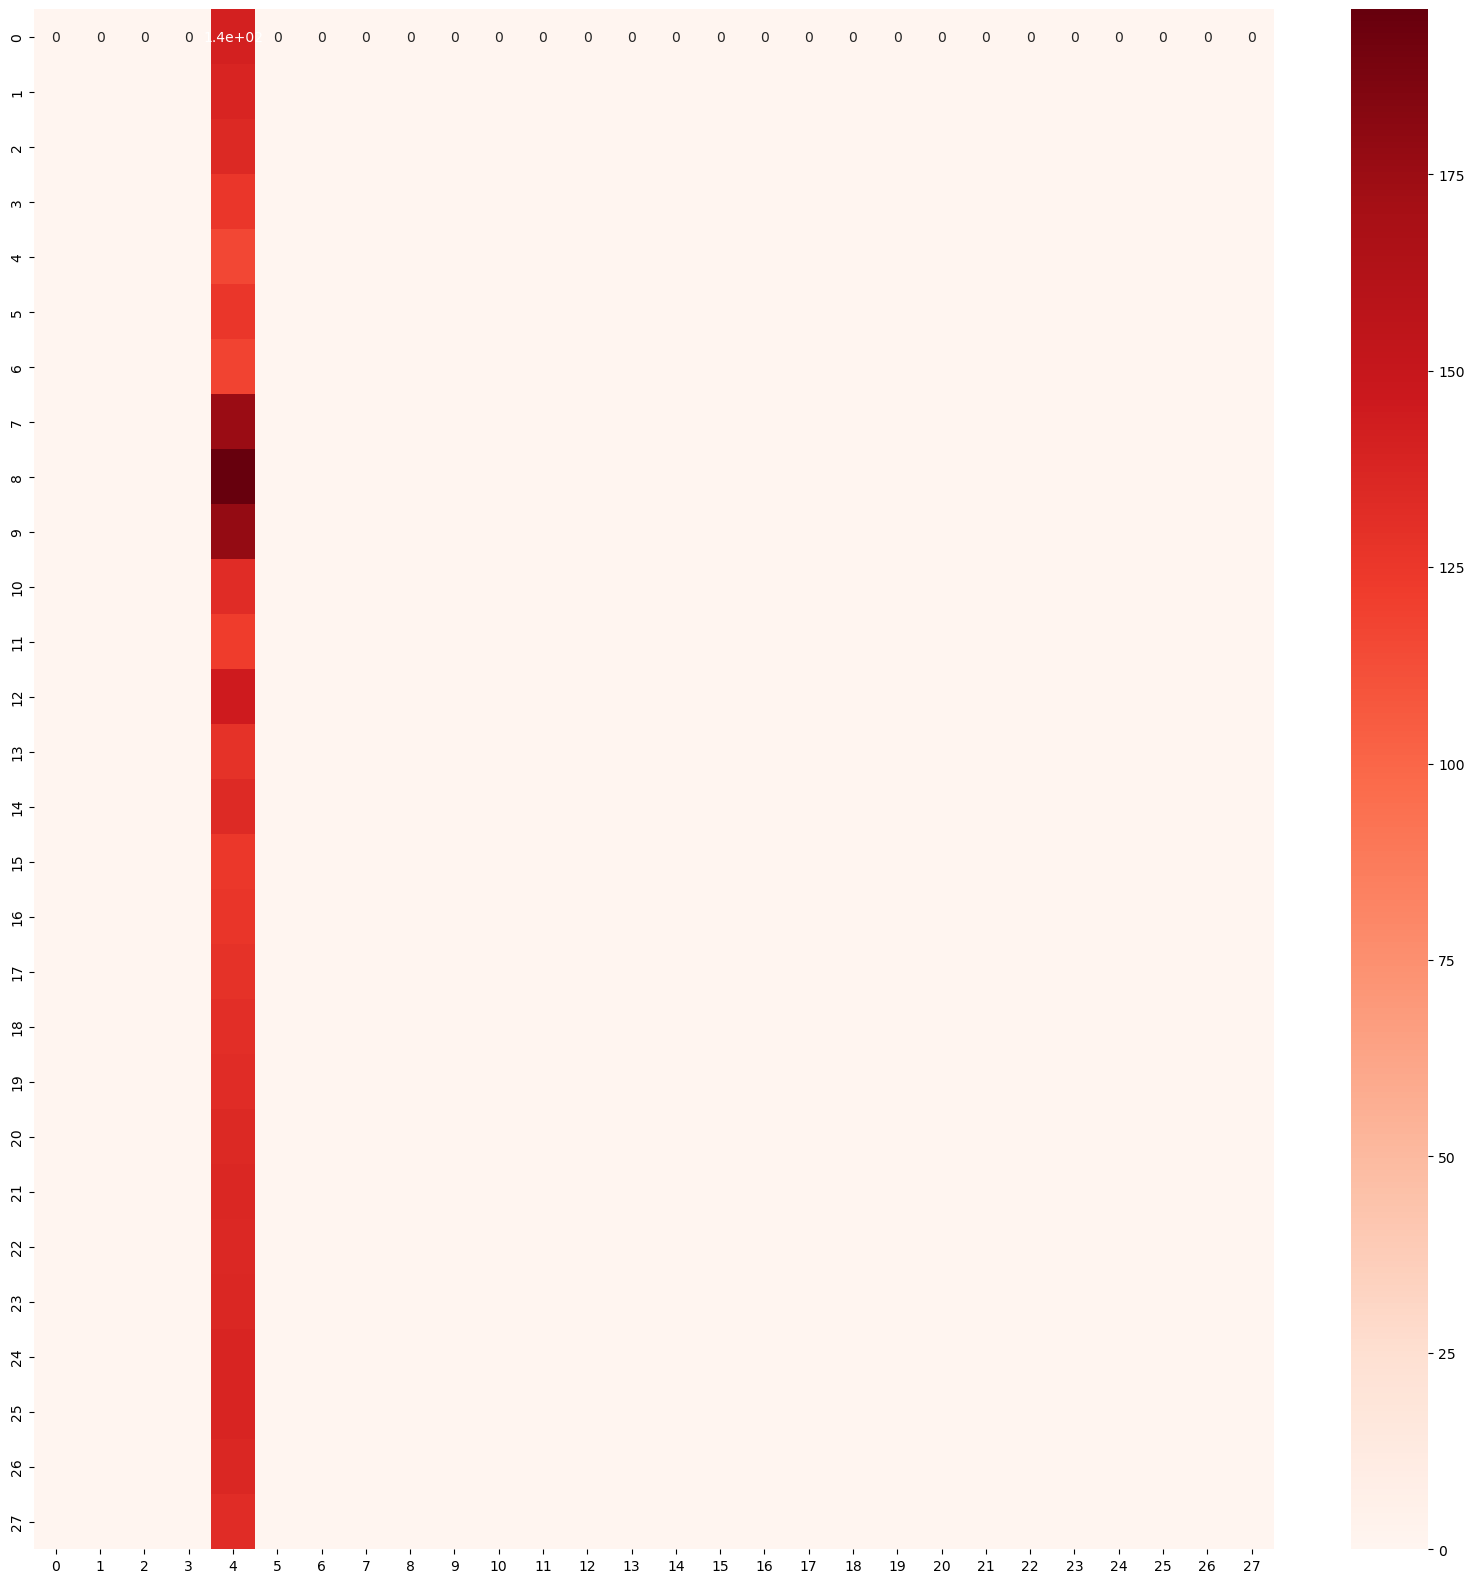

In [41]:
# seaborn으로 confusion matrix 시각화

fig, axes = plt.subplots(figsize=(20, 20))

# heatmap
sns.heatmap(cm_test, annot=True, cmap='Reds')
plt.show()

In [42]:
# 2. regression_abalone

In [43]:
df = pd.read_csv("/Users/gim-yuseong/Desktop/PycharmProjects/2024_3_2/2024_3_2_딥러닝응용/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [44]:
# df의 행의 갯수, 열의 갯수, feature 파악

df.shape, df.columns

((4177, 10),
 Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
        'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
       dtype='object'))

In [45]:
# 결측치 확인

df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [46]:
# 결측치 제거

df = df.dropna()
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

/var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_52119/638774577.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


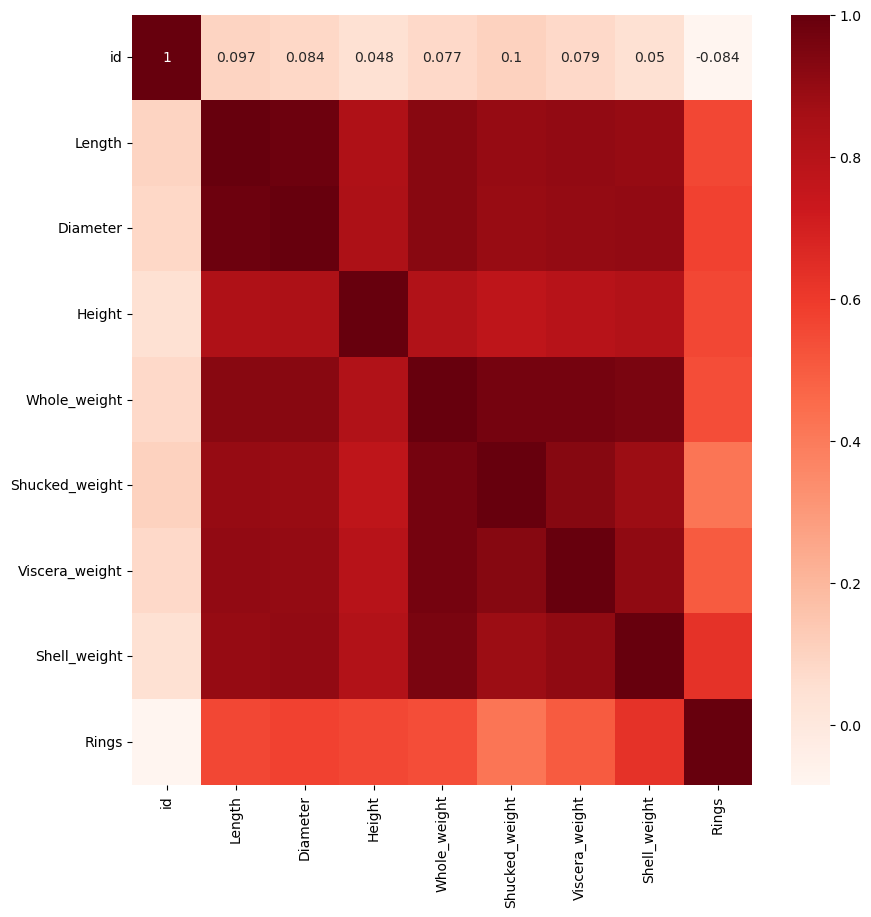

In [47]:
# heatmap 그리기

plt.figure(figsize=(10, 10))

df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cbar=True,
           cmap='Reds', annot_kws={"size": 10})
plt.show()

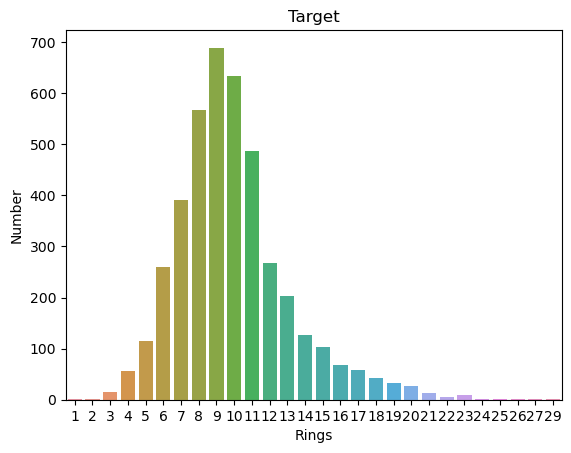

In [48]:
# seaborn countplot을 통한 각 레이블 도수 확인

sns.countplot (data=df, x='Rings')
plt.xlabel ("Rings")
plt.ylabel ("Number")
plt.title ("Target")
plt.show()

In [49]:
# target의 class 도수를 확인 (숫자로)

df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [50]:
# Sex, id 특성 제거 및 Rings를 label encoding

print (df.columns)
df = df.drop(columns=['Sex']) # Sex 특성 제거
df = df.drop(columns=['id']) # id 특성 제거

df['Rings'] = LabelEncoder().fit_transform(df['Rings'])

df.head(20)

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,14
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,6
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,8
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,7
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,19
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,15
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,8
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,18


In [51]:
# input, target 만들기

import matplotlib.pyplot as plt
import numpy as np

abalone_input = df.drop('Rings', axis=1)
abalone_target = df['Rings']

abalone_input.shape, abalone_target.shape

((4177, 7), (4177,))

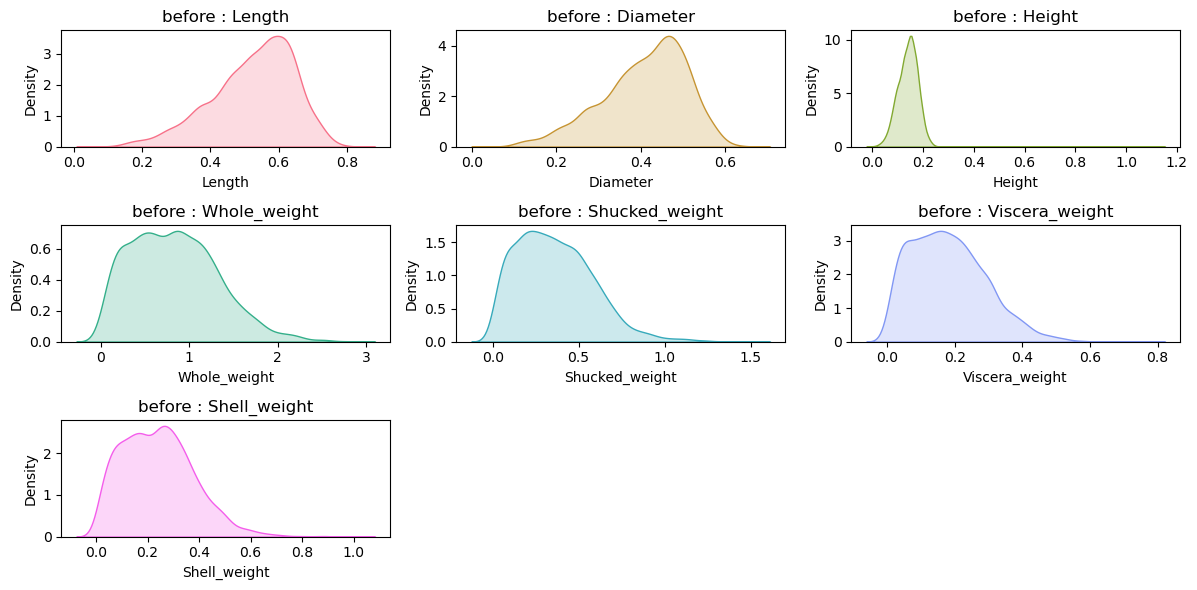

In [52]:
features = df.columns[:-1]  # 'Rings' 제외
plt.figure(figsize=(12, 6))
for i, feature in enumerate (features) :
    plt.subplot(3, 3, i+1)
    sns.kdeplot(abalone_input[feature], fill=True, color=sns.color_palette("husl", len(features))[i])
    plt.title(f'before : {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


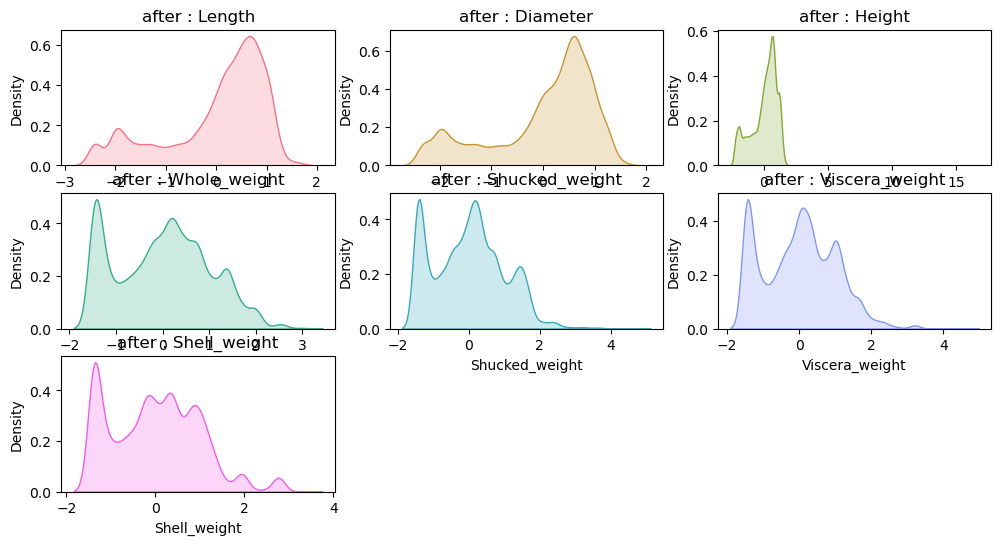

In [53]:
features = df.columns[:-1]  # 'Rings' 제외
plt.figure(figsize=(12, 6))
for i, feature in enumerate (features) :
    plt.subplot(3, 3, i+1)
    sns.kdeplot(abalone_input_scaled[feature], fill=True, color=sns.color_palette("husl", len(features))[i])
    plt.title(f'after : {feature}')
    plt.xlabel(feature)

In [54]:
def split_sequences(sequences, n_steps) :
	X, y = list(), list()
	for i in range(len(sequences)):
    # find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [59]:
# 결측치 개수 확인
print(abalone_target.isnull().sum())

# abalone_input_scaled의 크기를 abalone_target과 맞추기 (첫 4177개의 샘플만 사용)
abalone_input_scaled_subset = abalone_input_scaled.iloc[:abalone_target.shape[0], :]

# 두 배열 결합 후 시퀀스 나누기
X_seq, y_seq = split_sequences(np.c_[abalone_input_scaled_subset, abalone_target], 
                               n_steps=10)  # window 사이즈를 10으로 설정

# 결과 확인
print(X_seq.shape, y_seq.shape)


0
(4168, 10, 7) (4168,)


In [60]:
# 실제로 어떻게 구성되었는지 앞쪽 5개의 component만 출력

print (np.isnan(y_seq).sum())

for idx in range (5) :
    print (f"X_seq[{idx}] : ", X_seq[idx][:5])
    print (f"y_seq[{idx}] : ", y_seq[idx])
    
    if idx == 0 : 
        prev = X_seq[idx]
        print()
        continue

    if (prev[1:] == X_seq[idx][:-1]).all() : 
        '''
            step 1씩 이동했으니깐, 이전 X_train_seq 원소의 2번째 record ~ 마지막번째 record와
            현재 X_train_seq 원소의 첫번째 record ~ 마지막-1번째 record는 같을 수밖에 없습니다.
        '''
         
        print ("window가 step 1씩 이동하면서 순환 데이터를 만듦")
    
    prev = X_seq[idx]
    print()

0
X_seq[0] :  [[-0.30155492 -0.23675716 -0.8067802  -0.66944529 -0.53488412 -0.68733204
  -0.71126156]
 [-0.88361958 -0.90686457 -0.88977619 -1.12891255 -1.05449336 -1.10583231
  -1.09029195]
 [ 0.11420554  0.13180192 -0.1428123  -0.40985026 -0.40186415 -0.36448897
  -0.42698877]
 [-0.38470702 -0.23675716 -0.30880427 -0.66626007 -0.57229598 -0.5837034
  -0.68757216]
 [-0.99448903 -0.97387531 -1.05576816 -1.16156101 -1.0960621  -1.17757522
  -1.16136014]]
y_seq[0] :  18.0

X_seq[1] :  [[-0.88361958 -0.90686457 -0.88977619 -1.12891255 -1.05449336 -1.10583231
  -1.09029195]
 [ 0.11420554  0.13180192 -0.1428123  -0.40985026 -0.40186415 -0.36448897
  -0.42698877]
 [-0.38470702 -0.23675716 -0.30880427 -0.66626007 -0.57229598 -0.5837034
  -0.68757216]
 [-0.99448903 -0.97387531 -1.05576816 -1.16156101 -1.0960621  -1.17757522
  -1.16136014]
 [-0.46785911 -0.67232697 -0.8067802  -0.92824401 -0.88198309 -0.87466073
  -0.85339796]]
y_seq[1] :  13.0
window가 step 1씩 이동하면서 순환 데이터를 만듦

X_seq[2] :  [[ 

In [61]:
# label encoding 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_seq = le.fit_transform(y_seq)

print(y_seq[:5])  

[18 13  9 10  9]


In [62]:
# train, test set 구성

from sklearn.model_selection import train_test_split

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq,
                                                    y_seq,
                                                    test_size = 0.2) 

print (X_train_seq.shape, y_train_seq.shape)
print (X_test_seq.shape, y_test_seq.shape)

(3334, 10, 7) (3334,)
(834, 10, 7) (834,)


In [64]:
# modeling

from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))

'''
    점점 kernel size를 늘려나가서 feature extraction을 효과적으로 할 수 있도록 구성하였다.
    dense layer를 여기서 더 추가하면 overfitting이 일어나서, 여기서 멈춘다.
'''

# block 1
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
batch_norm1 = BatchNormalization()(conv1)
dropout1 = Dropout(0.6)(batch_norm1)

# block 2
conv2 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(dropout1)
batch_norm2 = BatchNormalization()(conv2)
dropout2 = Dropout(0.5)(batch_norm2)

# block 3
conv3 = Conv1D(filters=16, kernel_size=4, activation='relu', padding='same')(dropout2)
batch_norm3 = BatchNormalization()(conv3)
dropout3 = Dropout(0.5)(batch_norm3)

# block 4
conv4 = Conv1D(filters=8, kernel_size=4, activation='relu', padding='same')(dropout3)
batch_norm4 = BatchNormalization()(conv4)
dropout4 = Dropout(0.5)(batch_norm4)

# flatten
flat = Flatten()(dropout4)

# dense layers
dense1 = Dense(16, activation='relu')(flat)
output_layer = Dense(1)(dense1)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()
keras.utils.plot_model(model, 
                       show_shapes=True, 
                       show_layer_activations=True, 
                       show_dtype=True, 
                       show_layer_names=True, 
                       show_trainable=True)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 10, 7)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 9, 64)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 9, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 9, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 9, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 9, 16)          │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 9, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 9, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 9, 8)           │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 9, 8)           │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 9, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 72)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,385 (44.47 KB)

 Trainable params: 11,145 (43.54 KB)

 Non-trainable params: 240 (960.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [65]:
# compile

optimizer = keras.optimizers.Adam()
model.compile (optimizer=optimizer, 
               loss='MSE', 
               metrics=['MAE'])

In [2]:
from memory_profiler import profile
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 데이터 생성 예시 (임의의 데이터로 대체)
# 실사용에서는 X_seq, y_seq에 실제 데이터 사용
X_seq = np.random.random((500, 10, 5))  # 500개의 샘플, 각 샘플은 10개의 타임스텝, 각 타임스텝마다 5개의 특징
y_seq = np.random.random((500, 1))  # 500개의 타겟 값

# 데이터 분할
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.2)

# 간단한 모델 정의 예시
model = keras.Sequential([
    keras.layers.LSTM(50, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

@profile
def train_model(model, X_train_seq, y_train_seq):
    history = model.fit(X_train_seq, y_train_seq, epochs=60, 
                        validation_split=0.2,
                        batch_size=16,
                        verbose=True, shuffle=True)
    return history

# train_model을 실행하기 전에 데이터 및 모델 설정
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
history = train_model(model, X_train_seq, y_train_seq)


ERROR: Could not find file /var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_57774/2212291643.py
Epoch 1/60


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3758 - val_loss: 0.0788
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0910 - val_loss: 0.0833
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0907 - val_loss: 0.0790
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0875 - val_loss: 0.0789
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0861 - val_loss: 0.0787
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0884 - val_loss: 0.0793
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0896 - val_loss: 0.0790
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0811 - val_loss: 0.0789
Epoch 9/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0864 - val_loss: 0.0792
Epoch 10/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0835 - val_loss: 0.0799
Epoch 11/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0870 - val_loss: 0.0813
Epoch 12/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0834 - val_loss: 0.0796

{'loss': [0.24297955632209778, 0.09490742534399033, 0.09209389239549637, 0.0893935039639473, 0.09069325774908066, 0.08845405280590057, 0.08813468366861343, 0.08772499859333038, 0.08742187917232513, 0.08829547464847565, 0.08650904893875122, 0.0863426923751831, 0.08689754456281662, 0.08596104383468628, 0.0862557590007782, 0.08855309337377548, 0.08625541627407074, 0.08526888489723206, 0.08476974815130234, 0.08534257113933563, 0.08384422957897186, 0.08340198546648026, 0.08296815305948257, 0.08408252894878387, 0.08467434346675873, 0.08216686546802521, 0.08252492547035217, 0.08095361292362213, 0.08078999072313309, 0.08101861923933029, 0.0809439942240715, 0.07916022092103958, 0.07789824903011322, 0.07796327769756317, 0.07929347455501556, 0.07919903844594955, 0.07803773134946823, 0.07601317018270493, 0.07425916939973831, 0.07478936016559601, 0.07310153543949127, 0.07033441960811615, 0.0728134736418724, 0.0692676305770874, 0.06713154911994934, 0.06983955204486847, 0.06549695134162903, 0.0675302

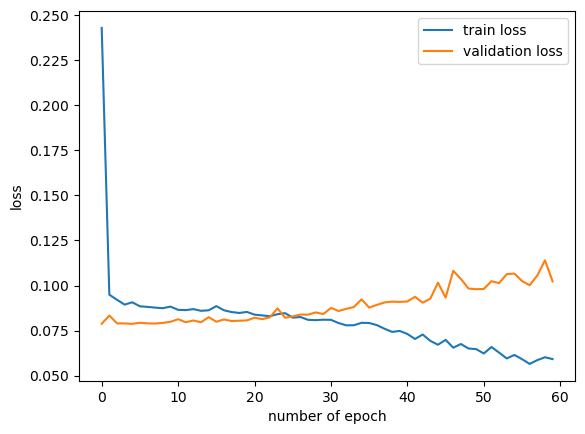

In [6]:
print (history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show()

Epoch 1/60


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0968 - mae: 0.2515 - val_loss: 0.0880 - val_mae: 0.2630
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0751 - mae: 0.2330 - val_loss: 0.0876 - val_mae: 0.2620
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0830 - mae: 0.2463 - val_loss: 0.0890 - val_mae: 0.2652
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0771 - mae: 0.2366 - val_loss: 0.0907 - val_mae: 0.2683
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0806 - mae: 0.2440 - val_loss: 0.0899 - val_mae: 0.2669
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0791 - mae: 0.2422 - val_loss: 0.0880 - val_mae: 0.2631
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0756 - mae: 0.2315 - val_loss: 0.0884 - val_mae: 0.2640
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0824 - mae: 0.2444 - val_loss: 0.0870 - val_mae: 0.2604
Epoch 9/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0809 - mae: 0.2429 - va

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0460 - mae: 0.1788 - val_loss: 0.1072 - val_mae: 0.2777
Epoch 56/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0435 - mae: 0.1675 - val_loss: 0.0994 - val_mae: 0.2699
Epoch 57/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0457 - mae: 0.1738 - val_loss: 0.1051 - val_mae: 0.2702
Epoch 58/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454 - mae: 0.1754 - val_loss: 0.1026 - val_mae: 0.2691
Epoch 59/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0408 - mae: 0.1653 - val_loss: 0.1034 - val_mae: 0.2695
Epoch 60/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0387 - mae: 0.1612 - val_loss: 0.1087 - val_mae: 0.2713
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


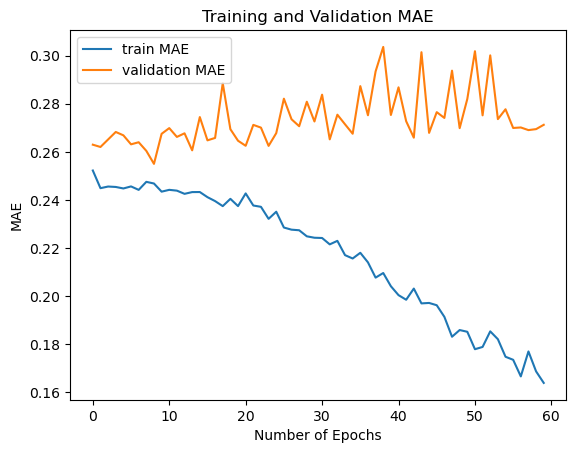

In [12]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# 데이터 생성 예시 (여기서는 랜덤 데이터 사용)
X_train_seq = np.random.random((500, 10, 5))  # 500 샘플, 10 타임스텝, 5 특징
y_train_seq = np.random.random((500, 1))  # 500 타겟

# 모델 정의
model = keras.Sequential([
    keras.layers.LSTM(50, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    keras.layers.Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(X_train_seq, y_train_seq, epochs=60, validation_split=0.2, batch_size=16)

# history의 키 출력
print(history.history.keys())  # 여기서 'mae' 또는 'MAE' 확인

# MAE 시각화
plt.plot(history.history['mae'], label='train MAE')  # training MAE
plt.plot(history.history['val_mae'], label='validation MAE')  # validation MAE
plt.xlabel('Number of Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MSE: 0.10486466786047025
MAE: 0.27886123494017007
R^2 Score: -0.167


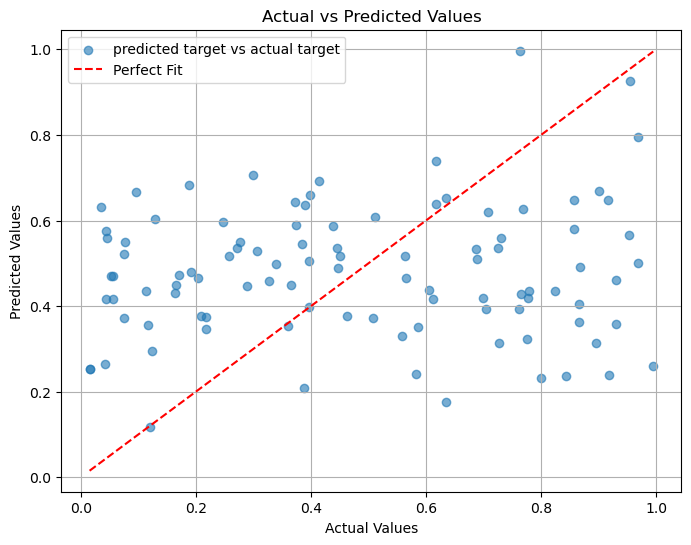

In [13]:
# MSE, MAE, R^2 구하기

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

y_test_pred = model.predict(X_test_seq)
# print (y_test_pred)

mse = mean_squared_error(y_test_seq, y_test_pred)
mae = mean_absolute_error(y_test_seq, y_test_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

r2_1 = r2_score(y_test_seq, y_test_pred)
print(f'R^2 Score: {r2_1:.3f}')

# 예측값과 실제값 시각화

plt.figure(figsize=(8, 6))
plt.scatter(y_test_seq, y_test_pred, alpha=0.6, 
            label='predicted target vs actual target')
plt.plot([min(y_test_seq), max(y_test_seq)], 
         [min(y_test_seq), max(y_test_seq)], 
         color='red', linestyle='--', 
         label='Perfect Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# evaluate

eval_1 = model.evaluate(X_test_seq, y_test_seq)
print (eval_1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1029 - mae: 0.2731 
[0.10486466437578201, 0.27886122465133667]


In [15]:
from tensorflow.keras import regularizers

# Input layer
input_layer = keras.Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))

'''
    계속적으로 val_loss가 늘어나는 현상 발견
    regularizer를 추가하여 l2 규제를 하게끔 함
    l1 규제 : 절댓값 규제 (특정 feature을 0으로 만들 수 있음)
    l2 규제 : 제곱 규제 (특정 feature을 0과 가깝게 만들 수 있음)
'''

# 첫 번째 LSTM 레이어 + BatchNormalization + Dropout
lstm_1 = keras.layers.LSTM(16, kernel_regularizer=regularizers.l2(0.01), 
                           return_sequences=True)(input_layer)
batch_1 = keras.layers.BatchNormalization()(lstm_1)
dropout_1 = keras.layers.Dropout(0.2)(batch_1)

# 두 번째 LSTM 레이어 + BatchNormalization + Dropout
lstm_2 = keras.layers.LSTM(16, kernel_regularizer=regularizers.l2(0.01), 
                           return_sequences=False)(dropout_1)
batch_2 = keras.layers.BatchNormalization()(lstm_2)
dropout_2 = keras.layers.Dropout(0.2)(batch_2)

# Dense 레이어 + Dropout
dense_1 = keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dropout_2)
dropout_3 = keras.layers.Dropout(0.2)(dense_1)

dense_2 = keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dropout_3)
dropout_4 = keras.layers.Dropout(0.2)(dense_2)

# Output layer
output_layer = keras.layers.Dense(1)(dropout_4)

# Model definition
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Model summary
model.summary()

# Plot model
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True,
                      show_dtype=True,
                      show_layer_names=True,
                      show_trainable=True)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 16)         │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 64 (256.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [16]:
# compile

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=optimizer, 
               loss='MSE', 
               metrics=['MAE'])

In [17]:
# fit

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping 및 ReduceLROnPlateau 추가함 (val_loss가 계속 상승하고 있어서 조치 취하기 위함)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

from memory_profiler import profile

@profile # 메모리 오버플로우로 인한 시스템 다운을 막기 위해서
def train_model() :
    history = model.fit(X_train_seq, y_train_seq, epochs=60, 
                        validation_split=0.2,
                       callbacks=[early_stopping, reduce_lr],
                        verbose=True)
    
    return history
    
history = train_model()
print (history)

ERROR: Could not find file /var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_57774/3872882423.py
Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - MAE: 1.2780 - loss: 3.2084 - val_MAE: 0.3688 - val_loss: 0.9912 - learning_rate: 0.0010
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.7552 - loss: 1.6212 - val_MAE: 0.3254 - val_loss: 0.9424 - learning_rate: 0.0010
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.6837 - loss: 1.5854 - val_MAE: 0.3276 - val_loss: 0.9343 - learning_rate: 0.0010
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.5363 - loss: 1.2222 - val_MAE: 0.3331 - val_loss: 0.9294 - learning_rate: 0.0010
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.5652 - loss: 1.2499 - val_MAE: 0.3418 - val_loss: 0.9276 - learning_rate: 0.0010
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.4685 - loss: 1.0747 - val_MAE: 0.3453 - val_loss: 0.9206 - learning_rate: 0.0010
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - M

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.2578 - loss: 0.4311 - val_MAE: 0.2568 - val_loss: 0.4265 - learning_rate: 0.0010
Epoch 48/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MAE: 0.2604 - loss: 0.4246 - val_MAE: 0.2568 - val_loss: 0.4199 - learning_rate: 0.0010
Epoch 49/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MAE: 0.2531 - loss: 0.4133 - val_MAE: 0.2569 - val_loss: 0.4117 - learning_rate: 0.0010
Epoch 50/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MAE: 0.2547 - loss: 0.4089 - val_MAE: 0.2569 - val_loss: 0.4043 - learning_rate: 0.0010
Epoch 51/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MAE: 0.2535 - loss: 0.4036 - val_MAE: 0.2565 - val_loss: 0.3969 - learning_rate: 0.0010
Epoch 52/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MAE: 0.2662 - loss: 0.4040 - val_MAE: 0.2565 - val_loss: 0.3900 - learning_rate: 0.0010
Epoch 53/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MAE: 0.2558 - loss: 0.3872 - val_MAE: 0.2565 - val_loss: 0.3832 - learning_rate: 0.0010
Epoch 54/60
13/13 ━━━━━━━

{'MAE': [1.1352875232696533, 0.6888165473937988, 0.6601565480232239, 0.543569028377533, 0.5441415905952454, 0.4800485372543335, 0.4832838475704193, 0.45555001497268677, 0.4258653521537781, 0.40690937638282776, 0.4125221371650696, 0.39605382084846497, 0.38033631443977356, 0.36479851603507996, 0.3542930483818054, 0.33718258142471313, 0.34899821877479553, 0.34172552824020386, 0.31951940059661865, 0.321648508310318, 0.3171927332878113, 0.31377220153808594, 0.28868746757507324, 0.2984216809272766, 0.29514995217323303, 0.30752941966056824, 0.28453686833381653, 0.2870953679084778, 0.28428447246551514, 0.2842766046524048, 0.2807023227214813, 0.294668585062027, 0.2860630452632904, 0.28464680910110474, 0.27636316418647766, 0.2712858319282532, 0.2871204912662506, 0.27953779697418213, 0.2756691873073578, 0.27749302983283997, 0.2682029604911804, 0.2646758556365967, 0.27435755729675293, 0.2661481201648712, 0.2660781443119049, 0.2635081112384796, 0.2651309669017792, 0.25807952880859375, 0.25834774971

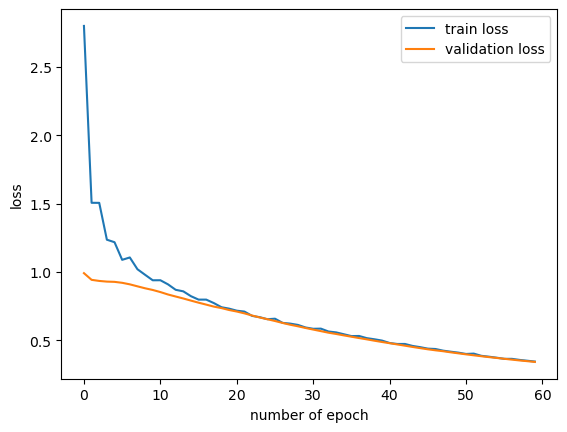

In [18]:
# history 그리고 loss 시각화

print (history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

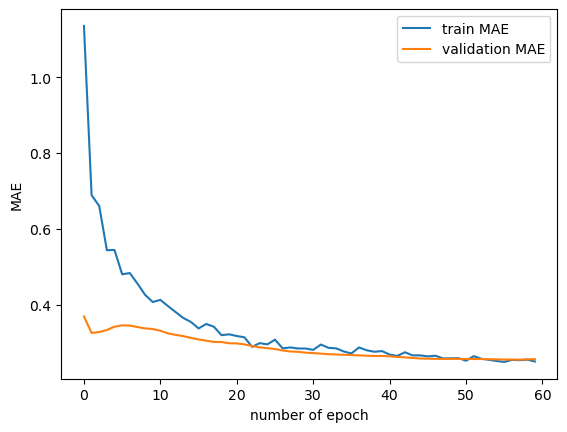

In [19]:

# MAE 시각화

plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.xlabel('number of epoch')
plt.ylabel('MAE')
plt.legend (['train MAE', 'validation MAE'])
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MSE: 0.09633733817416315
MAE: 0.263302466828824
R^2 Score: -0.072


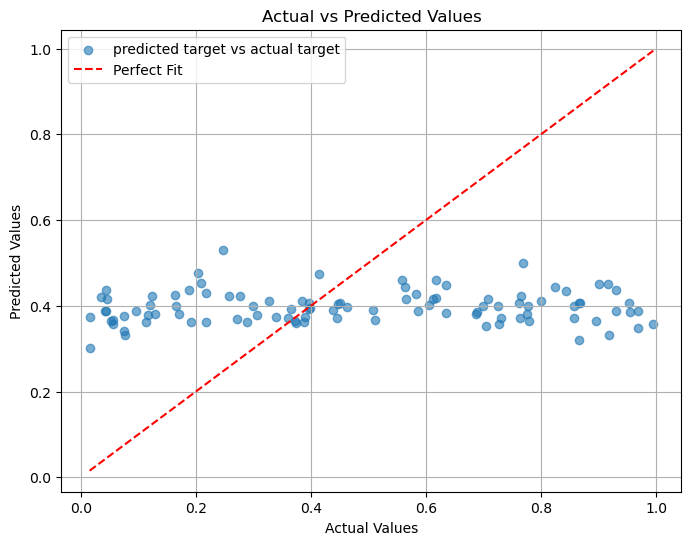

In [20]:
# MSE, MAE, R^2 구하기

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

y_test_pred = model.predict(X_test_seq)
# print (y_test_pred)

mse = mean_squared_error(y_test_seq, y_test_pred)
mae = mean_absolute_error(y_test_seq, y_test_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

r2_2 = r2_score(y_test_seq, y_test_pred)
print(f'R^2 Score: {r2_2:.3f}')

# 예측값과 실제값 시각화

plt.figure(figsize=(8, 6))
plt.scatter(y_test_seq, y_test_pred, alpha=0.6, 
            label='predicted target vs actual target')
plt.plot([min(y_test_seq), max(y_test_seq)], 
         [min(y_test_seq), max(y_test_seq)], 
         color='red', linestyle='--', 
         label='Perfect Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# evaluate

eval_2 = model.evaluate(X_test_seq, y_test_seq)
print (eval_2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 0.2670 - loss: 0.3514 
[0.34766045212745667, 0.2633024752140045]
